In [ ]:
import pandas as pd
from glob import glob
import os
import numpy as np
from tqdm import tqdm, tqdm_notebook
import plotly.offline as pyo
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from datetime import datetime
from datetime import date

In [ ]:
import plotly.io as pio
pio.renderers.default = "plotly_mimetype+notebook"

In [ ]:
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
%matplotlib inline
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import platform

path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
rc('axes', unicode_minus=False)  

In [ ]:
# go to file
os.chdir('../DATA_raw2')

In [ ]:
user = pd.read_pickle("../TBWA/user_fin.pkl")
order = pd.read_pickle("../TBWA/order_fin.pkl")

In [ ]:
print(len(user))
print(len(order))

1907989
4928381


# step1. 유저 매칭

### 유저 기본 정보

In [ ]:
def age(x) :
    if x == '19세 미만' :
        return 10
    elif (x == '20-24세') | (x == '25-29세'):
        return 20
    elif (x == '30~34세') | (x == '35~39세'):
        return 30
    elif (x == '40~44세') | (x == '45~49세'):
        return 40
    elif (x == '50~54세') | (x == '55~59세'):
        return 50
    else :
        return 60

user['c_연령대'] = user['연령대'].apply(age)

In [ ]:
def sex(x) :
    if x == 'F' :
        return 2
    else :
        return 1

user['c_성별'] = user['성별'].apply(sex)

In [ ]:
user['c_PC로그인횟수(누적)'] = user['PC로그인횟수_2020'] + user['PC로그인횟수_2021'] + user['PC로그인횟수_2022']
user['c_모바일로그인횟수(누적)'] = user['모바일로그인횟수_2020'] + user['모바일로그인횟수_2021'] + user['모바일로그인횟수_2022']
user['c_앱로그인횟수(누적)'] = user['앱로그인횟수_2020'] + user['앱로그인횟수_2021'] + user['앱로그인횟수_2022']
user['총 로그인횟수'] = user['c_PC로그인횟수(누적)'] + user['c_모바일로그인횟수(누적)'] + user['c_앱로그인횟수(누적)']
user['c_년간포인트사용액(누적)'] = user['년간포인트사용액_2020'] + user['년간포인트사용액_2021'] + user['년간포인트사용액_2022']
user['c_출석체크_응모건수(누적)'] = user['출석체크_응모건수_2020'] + user['출석체크_응모건수_2021'] + user['출석체크_응모건수_2022']
user['c_출석체크_응모건수(누적)'] = user['출석체크_응모건수_2020'] + user['출석체크_응모건수_2021'] + user['출석체크_응모건수_2022']
user['c_출석체크_참여일수(누적)'] = user['출석체크_참여일수_2020'] + user['출석체크_참여일수_2021'] + user['출석체크_참여일수_2022']
user['c_일반이벤트_응모건수(누적)'] = user['일반이벤트_응모건수_2020'] + user['일반이벤트_응모건수_2021'] + user['일반이벤트_응모건수_2022']
user['c_드로우 응모건수(누적)'] = user['드로우 응모건수_2020'] + user['드로우 응모건수_2021'] + user['드로우 응모건수_2022']

In [ ]:
user_fin = user[['고유번호','c_연령대', 'c_성별', '재가입횟수','리뷰작성건수', 'c_PC로그인횟수(누적)', 
    'c_모바일로그인횟수(누적)', 'c_앱로그인횟수(누적)','총 로그인횟수', 'c_년간포인트사용액(누적)', 'c_출석체크_응모건수(누적)', 
    'c_출석체크_참여일수(누적)', 'c_일반이벤트_응모건수(누적)', 'c_드로우 응모건수(누적)']]

### 구매횟수 ( = 방문건수)

In [ ]:
### 구매횟수
demo = order.groupby("고유번호", as_index=False).agg({'구매일자' : 'nunique'})
demo.rename(columns = {'구매일자' : '구매횟수'}, inplace = True)
user_fin = pd.merge(user_fin, demo, on = '고유번호', how = 'left')
user_fin['구매횟수'] = user_fin['구매횟수'].fillna(value=0)

In [ ]:
order.columns

Index(['고유번호', '브랜드명', '카테고리1', '카테고리2', '카테고리3', '상품명', '사이즈', '정상가', '판매가',
       '결제가', '쿠폰사용여부', '포인트사용여부', '구매일자', '구매시간', '구매처', 'O2O여부', '지점키워드',
       '지점키워드2'],
      dtype='object')

In [ ]:
order['c_구매처'] = order['지점키워드2']
order_pc = order[order['c_구매처']=='PC']
order_mobile = order[order['c_구매처']=='Mobile']
order_app = order[order['c_구매처']=='APP']
order_off = order[order['c_구매처']=='오프라인']

In [ ]:
order_pc = order_pc.groupby(['고유번호'], as_index = False).agg({'구매일자':'nunique'})
order_pc.rename(columns = {'구매일자' : 'pc_구매횟수'}, inplace = True)
order_mobile = order_mobile.groupby(['고유번호'], as_index = False).agg({'구매일자':'nunique'})
order_mobile.rename(columns = {'구매일자' : 'mobile_구매횟수'}, inplace = True)
order_app = order_app.groupby(['고유번호'], as_index = False).agg({'구매일자':'nunique'})
order_app.rename(columns = {'구매일자' : 'app_구매횟수'}, inplace = True)
order_off = order_off.groupby(['고유번호'], as_index = False).agg({'구매일자':'nunique'})
order_off.rename(columns = {'구매일자' : '오프_구매횟수'}, inplace = True)

In [ ]:
user_fin = pd.merge(user_fin, order_pc, on = '고유번호', how = 'left')
user_fin['pc_구매횟수'] = user_fin['pc_구매횟수'].fillna(value=0)
user_fin = pd.merge(user_fin, order_mobile, on = '고유번호', how = 'left')
user_fin['mobile_구매횟수'] = user_fin['mobile_구매횟수'].fillna(value=0)
user_fin = pd.merge(user_fin, order_app, on = '고유번호', how = 'left')
user_fin['app_구매횟수'] = user_fin['app_구매횟수'].fillna(value=0)
user_fin = pd.merge(user_fin, order_off, on = '고유번호', how = 'left')
user_fin['오프_구매횟수'] = user_fin['오프_구매횟수'].fillna(value=0)

### 구매상품수


In [ ]:
# 전체 구매건수
data = order.groupby('고유번호', as_index = False).agg({'상품명':'count'})
data.rename(columns = {'상품명' : '구매상품수'}, inplace = True)
user_fin = pd.merge(user_fin, data, on = '고유번호', how = 'left')
user_fin['구매상품수'] = user_fin['구매상품수'].fillna(value=0)

In [ ]:
user_fin['1회구매 당 상품수'] = user_fin['구매상품수'] / user_fin['구매횟수']
user_fin['1회구매 당 상품수'] = user_fin['1회구매 당 상품수'].fillna(value=0)

### 구매주기

In [ ]:
## 구매주기
data = order.groupby(['고유번호', '구매일자']).agg({'상품명':'count'})
data = data.reset_index().rename(columns={"index": "id"})
data['직전구매일자'] = data.groupby('고유번호').구매일자.shift()
data['구매소요시간'] = data['구매일자'] - data['직전구매일자']
data['구매소요시간'] = data['구매소요시간'].dt.days
data['구매소요시간'] = np.where(data['구매소요시간'].isna(), 0, data['구매소요시간'])
data2 = data.groupby('고유번호').agg({'구매소요시간':'sum'})
data2 = data2.reset_index().rename(columns={"index": "id"})
data3 = data.groupby('고유번호').agg({'상품명':'sum'})   #같은날에 많이 사는건 주기에 안치면 구매소요시간:count, 치면 '상품명':sum 으로
data3 = data3.reset_index().rename(columns={"index": "id"})
data3.columns = ['고유번호', '카운트']
data3['카운트'] = data3['카운트'] -1
df = pd.merge(data2, data3, on = '고유번호', how = 'inner')

In [ ]:
# 구매주기 (2회 이상 구매자)
df2 = df[df['카운트'] != 0].reset_index(drop=True) 
df2['구매주기'] = df2['구매소요시간'] / df2['카운트']
df3 = df2[['고유번호', '구매주기']]

In [ ]:
user_fin = pd.merge(user_fin, df3, on = '고유번호', how = 'left')
user_fin['구매주기'] = user_fin['구매주기'].fillna(value=0)

In [ ]:
# 구매주기가 0인 사람 = 하루 이용 구매자
df_0 = df[(df['카운트'] == 0) | (df['구매소요시간'] ==0 )]
df_0['하루 이용 구매자'] = 1
df_0 = df_0[['고유번호', '하루 이용 구매자']]
user_fin = pd.merge(user_fin, df_0, on = '고유번호', how = 'left')
user_fin['하루 이용 구매자'] = user_fin['하루 이용 구매자'].fillna(value=0)

### 구매 후 현재까지 비구매활동 기간
- 가장 최신 구매일인 2022년 12월 31일을 기준으로 계산

In [ ]:
## 비활동 기간
dateformat = "%Y-%m-%d"
str_datetime = "2023-01-01"
datetime_convert2 = datetime.strptime(str_datetime, dateformat)
datetime_convert2

data4 = order.groupby('고유번호').agg({'구매일자':'max'})
data4 = data4.reset_index().rename(columns={"index": "id"})
data4['비구매기간'] = datetime_convert2 - data4['구매일자']
data4['비구매기간'] = data4['비구매기간'].dt.days
data4 = data4[['고유번호', '비구매기간']]

In [ ]:
user_fin = pd.merge(user_fin, data4, on = '고유번호', how = 'left')
user_fin['비구매기간'] = user_fin['비구매기간'].fillna(value=0)

### o2o 이용 횟수

In [ ]:
qq = order[order['O2O여부'] == 'O']
qq = qq.groupby(['고유번호'], as_index=False).agg({'O2O여부': 'count'})
qq = qq.rename(columns = {'O2O여부' : 'O2O횟수'}).reset_index(drop=True)

In [ ]:
user_fin = pd.merge(user_fin, qq, on = '고유번호', how = 'left')
user_fin['O2O횟수'] = user_fin['O2O횟수'].fillna(value=0)

### 사이즈수, 브랜드수, 최고가 상품

In [ ]:
## 사이즈수_c , 브랜드_c, 최고가상품
demo = order.groupby("고유번호", as_index=False).agg({'사이즈' : 'nunique'})
demo.rename(columns = {'사이즈' : '사이즈수_c'}, inplace = True)
user_fin = pd.merge(user_fin, demo, on = '고유번호', how = 'left')
user_fin['사이즈수_c'] = user_fin['사이즈수_c'].fillna(value=0)


In [ ]:
demo = order.groupby("고유번호", as_index=False).agg({'브랜드명' : 'nunique'})
demo.rename(columns = {'브랜드명' : '브랜드_c'}, inplace = True)
user_fin = pd.merge(user_fin, demo, on = '고유번호', how = 'left')
user_fin['브랜드_c'] = user_fin['브랜드_c'].fillna(value=0)

In [ ]:
demo = order.groupby("고유번호", as_index=False).agg({'결제가' : 'sum'})
demo.rename(columns = {'결제가' : '결제가'}, inplace = True)
user_fin = pd.merge(user_fin, demo, on = '고유번호', how = 'left')
user_fin['결제가'] = user_fin['결제가'].fillna(value=0)

In [ ]:
demo = order.groupby("고유번호", as_index=False).agg({'결제가' : 'max'})
demo.rename(columns = {'결제가' : '최고가상품값'}, inplace = True)
user_fin = pd.merge(user_fin, demo, on = '고유번호', how = 'left')
user_fin['최고가상품값'] = user_fin['최고가상품값'].fillna(value=0)

### 프로모션 이용 

In [ ]:
order_online = pd.read_pickle("../TBWA/order_online.pkl")
order_offline = pd.read_pickle("../TBWA/order_offline.pkl")

In [ ]:
promo = pd.read_excel('file/ABC 프로모션 list2.xlsx')

In [ ]:
order_com = pd.concat([order_online, order_offline], axis =0)

In [ ]:
promo

,년도,채널,행사명,행사 내용,행사 구분,시작일,종료일
0,2022,온라인,새해 행사,"호랑이띠 회원 22%할인쿠폰, 멤버십 10%할인쿠폰 증정",쿠폰,2022-01-01,2022-01-13
1,2022,온라인,신년 행사,신상품 10%할인쿠폰 증정 (온/오프라인 동시),쿠폰,2022-01-14,2022-01-24
2,2022,온라인,설 행사,최대 2만원 할인쿠폰 등 4종 쿠폰 증정,쿠폰,2022-01-25,2022-02-06
3,2022,온라인,발렌타인,"1족 구매 시 10%, 2족 이상 구매 시 20%할인 (온/오프라인 동시)","단순 할인, 조건 할인",2022-02-08,2022-02-14
4,2022,온라인,아트닷컴 2주년,"20%할인, 추가 10%할인쿠폰, 당일/새벽배송 무료 쿠폰 증정.\n나이키, 아디다...","쿠폰, 단순 할인",2022-02-18,2022-02-27
...,...,...,...,...,...,...,...
142,2019,오프라인,할로윈데이,키즈 상품 1족 구매 시 10% / 2족 이상 구매 시 20% 할인,"단순 할인, 조건 할인",2019-10-25,2019-10-31
143,2019,오프라인,빼빼로데이,1족 구매 시 10% / 2족 이상 구매 시 20% 할인,"단순 할인, 조건 할인",2019-11-07,2019-11-11
144,2019,오프라인,블랙 ABC데이,결산세일 최대 70%할인 (온/오프라인 동시),단순 할인,2019-11-21,2019-12-15
145,2019,오프라인,크리스마스,"신상품 20%할인,",단순 할인,2019-12-16,2019-12-25


In [ ]:
demo = order_com[['고유번호', '구매일자','결제가','행사참여']]
demo.행사참여 = demo.행사참여.astype(object)
demo2 = demo.explode('행사참여')
demo2['행사참여'] = demo2['행사참여'].fillna(value='행사x')
demo2 = demo2.rename(columns = {'행사참여' : '행사번호'})

In [ ]:
promo = promo.reset_index()
promo = promo.rename(columns = {'index' : '행사번호'})

In [ ]:
promo_sample = promo[['행사번호', '행사 구분']]
promo_sample['행사 구분'] = promo_sample['행사 구분'].str.replace(" ", "")
promo_sample['행사 구분'] = promo_sample['행사 구분'].str.split(',')
promo_sample = promo_sample.join(promo_sample['행사 구분'].apply(lambda x: pd.Series(x)).stack().reset_index(1,name='c_행사구분').drop('level_1', axis=1))
promo_sample = promo_sample.drop(labels = '행사 구분', axis=1)
df = pd.merge(demo2, promo_sample, on = '행사번호', how= 'left')

In [ ]:
df= df[df['행사번호'] != '행사x']

In [ ]:
promo_sample2 = promo[['행사번호', '채널']]
df = pd.merge(df, promo_sample2, on = '행사번호', how= 'left')

In [ ]:
## 프로모션 참여횟수
qq = df.groupby(['고유번호'], as_index=False).agg({'c_행사구분':'count'})
qq = qq.rename(columns = {'c_행사구분' : '프로모션 참여횟수'})
user_fin = pd.merge(user_fin, qq, on = '고유번호', how = 'left')
user_fin['프로모션 참여횟수'] = user_fin['프로모션 참여횟수'].fillna(value=0)

In [ ]:
## 채널 별 참여횟수
df_off = df[df['채널'] == '오프라인']
df_on = df[df['채널'] == '온라인']

In [ ]:
df_off = df_off.groupby(['고유번호'], as_index = False).agg({'행사번호':'count'})
df_off.rename(columns = {'행사번호' : '오프라인 참여횟수'}, inplace = True)
df_on = df_on.groupby(['고유번호'], as_index = False).agg({'행사번호':'count'})
df_on.rename(columns = {'행사번호' : '온라인 참여횟수'}, inplace = True)

In [ ]:
user_fin = pd.merge(user_fin, df_off, on = '고유번호', how = 'left')
user_fin['오프라인 참여횟수'] = user_fin['오프라인 참여횟수'].fillna(value=0)
user_fin = pd.merge(user_fin, df_on, on = '고유번호', how = 'left')
user_fin['온라인 참여횟수'] = user_fin['온라인 참여횟수'].fillna(value=0)


In [ ]:
## 행사 별 참여횟수
df_simpledc = df[df['c_행사구분'] == '단순할인']
df_condc = df[df['c_행사구분'] == '조건할인']
df_coupon = df[df['c_행사구분'] == '쿠폰']
df_draw = df[df['c_행사구분'] == '경품']
df_free = df[df['c_행사구분'] == '사은품']

In [ ]:
df_simpledc = df_simpledc.groupby(['고유번호'], as_index = False).agg({'행사번호':'count'})
df_simpledc.rename(columns = {'행사번호' : '단순할인프모 참여횟수'}, inplace = True)
df_condc = df_condc.groupby(['고유번호'], as_index = False).agg({'행사번호':'count'})
df_condc.rename(columns = {'행사번호' : '조건할인프모 참여횟수'}, inplace = True)
df_coupon = df_coupon.groupby(['고유번호'], as_index = False).agg({'행사번호':'count'})
df_coupon.rename(columns = {'행사번호' : '쿠폰프모 참여횟수'}, inplace = True)
df_draw = df_draw.groupby(['고유번호'], as_index = False).agg({'행사번호':'count'})
df_draw.rename(columns = {'행사번호' : '경품프모 참여횟수'}, inplace = True)
df_free = df_free.groupby(['고유번호'], as_index = False).agg({'행사번호':'count'})
df_free.rename(columns = {'행사번호' : '사은품프모 참여횟수'}, inplace = True)

In [ ]:
user_fin = pd.merge(user_fin, df_simpledc, on = '고유번호', how = 'left')
user_fin['단순할인프모 참여횟수'] = user_fin['단순할인프모 참여횟수'].fillna(value=0)
user_fin = pd.merge(user_fin, df_condc, on = '고유번호', how = 'left')
user_fin['조건할인프모 참여횟수'] = user_fin['조건할인프모 참여횟수'].fillna(value=0)
user_fin = pd.merge(user_fin, df_coupon, on = '고유번호', how = 'left')
user_fin['쿠폰프모 참여횟수'] = user_fin['쿠폰프모 참여횟수'].fillna(value=0)
user_fin = pd.merge(user_fin, df_draw, on = '고유번호', how = 'left')
user_fin['경품프모 참여횟수'] = user_fin['경품프모 참여횟수'].fillna(value=0)
user_fin = pd.merge(user_fin, df_free, on = '고유번호', how = 'left')
user_fin['사은품프모 참여횟수'] = user_fin['사은품프모 참여횟수'].fillna(value=0)

In [ ]:
# 프로모션 기간에 가입 여부
sign = pd.read_pickle("../TBWA/promo_signup.pkl")

In [ ]:
sign = sign.explode('프모기간가입')
sign['프모기간가입'] = sign['프모기간가입'].fillna(value='행사x')
sign['프모기간가입'] = np.where(sign['프모기간가입']== '행사x', 0 ,1)
sign = sign.groupby('고유번호', as_index = False).agg({'프모기간가입' : 'mean'})
#sign.to_pickle("../signup.pkl")

In [ ]:
user_fin = pd.merge(user_fin, sign, on = '고유번호', how = 'left')

In [ ]:
user_fin[['고유번호', '오프라인 참여횟수', '온라인 참여횟수']].to_pickle("../TBWA/offon.pkl")

In [ ]:
# 쿠폰사용횟수, 포인트사용횟수
point_list = []

for i in range(len(order)) : 
    if order['쿠폰사용여부'][i] == 'O' :
        point_list.append(1)
    else : 
        point_list.append(0)

order['c_쿠폰사용여부'] = point_list

demo = order.groupby("고유번호", as_index=False).agg({'c_쿠폰사용여부' : 'sum'})
demo.rename(columns = {'c_쿠폰사용여부' : '쿠폰사용횟수'}, inplace = True)
user_fin = pd.merge(user_fin, demo, on = '고유번호', how = 'left')
user_fin['쿠폰사용횟수'] = user_fin['쿠폰사용횟수'].fillna(value=0)

In [ ]:
point_list = []

for i in range(len(order)) : 
    if order['포인트사용여부'][i] == 'O' :
        point_list.append(1)
    else : 
        point_list.append(0)

order['c_포인트사용여부'] = point_list

demo = order.groupby("고유번호", as_index=False).agg({'c_포인트사용여부' : 'sum'})
demo.rename(columns = {'c_포인트사용여부' : '포인트사용횟수'}, inplace = True)
user_fin = pd.merge(user_fin, demo, on = '고유번호', how = 'left')
user_fin['포인트사용횟수'] = user_fin['포인트사용횟수'].fillna(value=0)

In [ ]:
user_fin.to_pickle("../TBWA/user_ym.pkl")

## 전체 테이블 구성

- **[유저 코드]** : 고유번호
- **[유저 정보]** : 연령대, 성별
- **[가입, 로그인]** : 재가입횟수, pc로그인, 모바일로그인, 앱로그인, 신규가입
- **[이벤트]** : 출첵응모 (전체적으로), 출첵참여(버튼건바이건), 일반이벤트응모, 드로우응모
- **[적립]** : 리뷰작성, 포인트 사용액
- **[구매량]** : 구매횟수, 채널별 구매횟수(pc,모바일,앱,오프), 구매상품수, 1회 구매당 상품수, 총결제가, 최고상품가
- **[구매 패턴]** :구매주기, 하루 이용자, 비구매기간, o2o사용횟수, 카테고리1(신발, 의류, 용품), 카테고리2(키즈, 기타상품, ots, 스포츠, 레더케쥬얼, 레이디스슈즈, 비즈니스 슈즈), 사이즈, 브랜드, 스테디셀러, PB브랜드
- **[프로모션]** : 프로모션 총참여횟수, 종류별 참여횟수(단순할인, 조건할인, 쿠폰, 경품, 사은품) 

# step 2. 도소매상 제외

In [ ]:
total['구매횟수'].quantile(0.999) #0.1

36.0

In [ ]:
total['1회구매 당 상품수'].quantile(0.999)

7.666666666666667

In [ ]:
total['c_년간포인트사용액(누적)'].quantile(0.999)

76700.0

In [ ]:
total['사이즈수_c'].quantile(0.999)

15.0

In [ ]:
df = total[(total['구매횟수'] >= total['구매횟수'].quantile(0.999)) & (total['c_년간포인트사용액(누적)'] >= total['c_년간포인트사용액(누적)'].quantile(0.999))&
        (total['사이즈수_c'] >= total['사이즈수_c'].quantile(0.999)) & 
        (total['1회구매 당 상품수'] >= total['1회구매 당 상품수'].quantile(0.999)) ]


In [ ]:
len(df)

79

In [ ]:
# 도소매상의 구매횟수가 전체 구매횟수에서 차지하는 비율
df_list = df['고유번호'].unique()
domes = []
for i in range(len(total)) : 
    if total['고유번호'][i] in df_list :
        domes.append('도소매상 o')
    else :
        domes.append('도소매상 x')
 
total['domes'] = domes

In [ ]:
one = total.groupby(['domes'], as_index =False).agg({'구매횟수' : 'sum'})
fig = px.pie(one, values='구매횟수', names='domes', title='전체 구매횟수에서 차지하는 비율은 23%', color = 'domes') 
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [ ]:
df[['구매횟수','구매상품수', '1회방문 당 구매상품수','c_년간포인트사용액(누적)','사이즈수_c', '브랜드_c','리뷰작성건수']].describe()

# step 2. 유저 구분 : 상위 2.5% / 신규가입 회원 분리

### 1) 방문건수 상위 2.5% => 상위 충성고객

In [ ]:
total['방문건수'].describe()

In [ ]:
high_group = total[total['방문건수'] >= total['방문건수'].quantile(0.975)]

In [ ]:
list = total[total['구매건수'] >= 14]['고유번호'].unique()
index = total[total['고유번호'].isin(list)].index
total = total.drop(index, inplace = False).reset_index(drop=True) 

In [ ]:
len(high_group) 

50325

In [ ]:
len(total) 

1858469

In [ ]:
high_group = high_group[['고유번호', '총 로그인횟수',  'c_년간포인트사용액(누적)', '방문건수',
       'pc_방문건수', 'mobile_방문건수', 'app_방문건수', '오프_방문건수', '구매건수', '1회방문 당 구매건수',
        '결제가', '사이즈수_c', '브랜드_c', '최고가상품값']]

In [ ]:
high_cluster = high_group.drop(labels='고유번호',axis=1)

### 2) 신규가입회원 분리

In [ ]:
new_group = total[total.new_c == 1]

In [ ]:
list = total[total.new_c == 1]['고유번호'].unique()
index = total[total['고유번호'].isin(list)].index
total = total.drop(index, inplace = False).reset_index(drop=True) \

In [ ]:
len(new_group)  #20만명 제외

206368

In [ ]:
len(total) #170만 남음

1702426

# step 3. RFM Score 계산

- R : 비구매기간 (2022.12.31 - 회원의 가장 최근 구매일자)
- F : 구매주기
- M : 구매금액

In [ ]:
rfm = total[['고유번호','비구매기간', '구매주기', '결제가']]

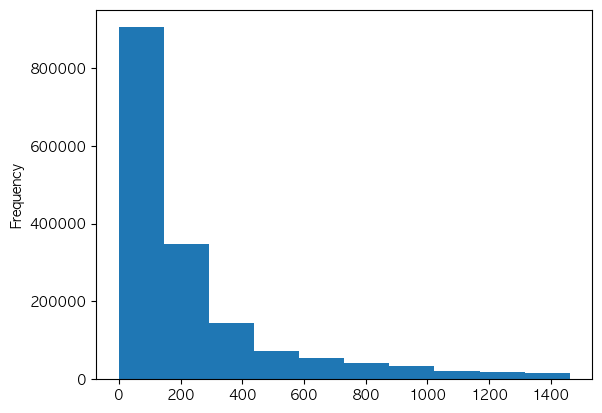

In [ ]:
#recency
rfm.비구매기간.plot.hist()
plt.show()

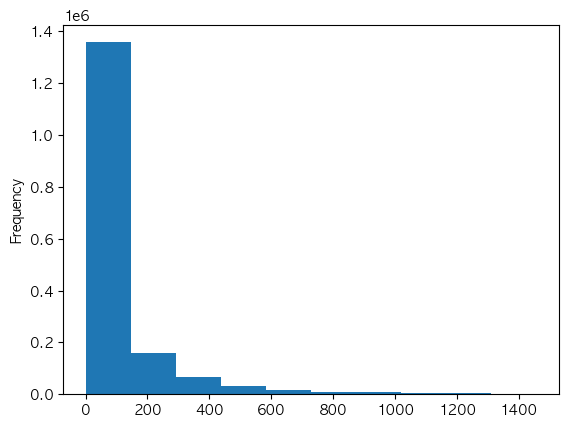

In [ ]:
# frequency
rfm.구매주기.plot.hist()
plt.show()

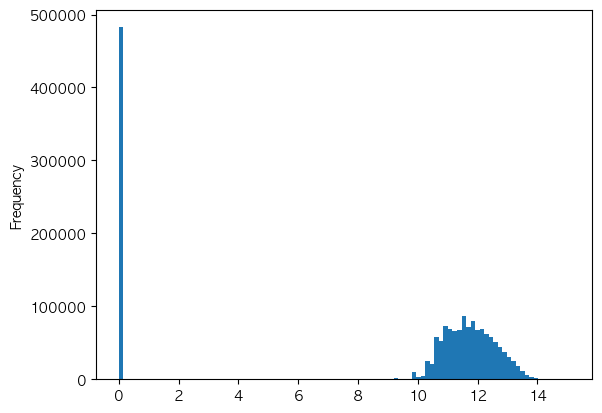

In [ ]:
#monetary
rfm.결제가.apply(lambda x : np.log1p(x)).plot.hist(bins=100) # 종모양 분포로 바꿈.
plt.show() 

In [ ]:
rfm.columns = ['고유번호','recency', 'frequency', 'monetary']

In [ ]:
# recency 비활동기간
rfm.recency.quantile([1/7, 2/7,3/7,4/7,5/7,6/7])

0.142857      0.0
0.285714      0.0
0.428571     91.0
0.571429    165.0
0.714286    265.0
0.857143    486.0
Name: recency, dtype: float64

In [ ]:
def recency(x) :
    if x > 486 :
        return 1
    elif x > 265 :
        return 2
    elif x > 165 :
        return 3
    elif x > 91 :
        return 4
    elif x == 0 :
        return 1
    else : 
        return 5

rfm['R'] = rfm['recency'].apply(recency) # 비활동기간 작을수록 큼, 비구매기간이 0이면 구매x = 1부여

/var/folders/fz/r9bgvykj2s5_nr_ytqg957zr0000gp/T/ipykernel_41983/1822634263.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# frequency 구매주기
rfm.frequency.quantile([1/11, 2/11,3/11,4/11,5/11,6/11,7/11,8/11,9/11,10/11])

0.090909      0.000000
0.181818      0.000000
0.272727      0.000000
0.363636      0.000000
0.454545      0.000000
0.545455      0.000000
0.636364      3.000000
0.727273     75.545455
0.818182    145.666667
0.909091    280.000000
Name: frequency, dtype: float64

In [ ]:
def frequency(x) :
    if x > 280 :
        return 1
    elif x > 145 :
        return 2
    elif x > 75 :
        return 3
    elif x > 3 :
        return 4
    elif x == 0 :
        return 1
    else : 
        return 5

rfm['F'] = rfm['frequency'].apply(frequency) # 구매주기 작을수록 점수 큼, 구매주기가 0이면 1부여

/var/folders/fz/r9bgvykj2s5_nr_ytqg957zr0000gp/T/ipykernel_41983/2952490578.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# monetary
rfm.monetary.quantile([1/7, 2/7,3/7,4/7,5/7,6/7])

0.142857         0.0
0.285714         0.0
0.428571     59000.0
0.571429     98000.0
0.714286    154000.0
0.857143    267600.0
Name: monetary, dtype: float64

In [ ]:
def monetary(x) :
    if x > 267600 :
        return 5
    elif x > 154000 :
        return 4
    elif x > 98000 :
        return 3
    elif x > 59000 :
        return 2
    else : 
        return 1

rfm['M'] = rfm['monetary'].apply(monetary) # 구매금액 많을수록 큼

/var/folders/fz/r9bgvykj2s5_nr_ytqg957zr0000gp/T/ipykernel_41983/2840109552.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
rfm

,고유번호,recency,frequency,monetary,R,F,M
0,48066EF2E782C577A25A7A0C38CFCAECE33A2420BFB8EC...,0.0,0.00,0.0,1,1,1
1,4ED3B18A3DB2CE13DE559397E59FAF3701B9A49685EB28...,0.0,0.00,0.0,1,1,1
2,47EB4685B42EF7BD6B60DCBAF4611FC729D1FA3189D149...,0.0,0.00,0.0,1,1,1
3,ACF7ECFA0C20E47E546A0A17A1F992635DBF9BD10BD386...,0.0,0.00,0.0,1,1,1
4,A8DE55F062184E7417A56C11409EC72D8D8D5F72D62016...,139.0,0.00,19000.0,4,1,1
...,...,...,...,...,...,...,...
1659066,01D3C985A617B26D486CF4118231271B2C8B2BE3D6EB47...,104.0,0.00,29000.0,4,1,1
1659067,A06854C47821CD827A04FA7A35A5CCF4B78C5395C9FE95...,104.0,168.40,271200.0,4,2,5
1659068,037FFA290571A7D2C673240F51FB5C0B6CAB678CD24CB4...,0.0,0.00,0.0,1,1,1
1659069,A1F7001C515A5EE424CAD2E96AC61D8E5033D272EB9223...,490.0,224.75,219000.0,1,2,4


In [ ]:
# RFM 점수 부여 -> rfm점수 클수록 좋음
#weights = [4, 2, 4] # 가중치
#rfm['RFMscore'] = weights[0] * rfm['R'] + weights[1] * rfm['F'] + weights[2] * rfm['M']

rfm['RFMscore'] = 2*rfm['R'] + 4*rfm['F'] + 4*rfm['M']
rfm 

/var/folders/fz/r9bgvykj2s5_nr_ytqg957zr0000gp/T/ipykernel_41983/774422759.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,고유번호,recency,frequency,monetary,R,F,M,RFMscore
0,48066EF2E782C577A25A7A0C38CFCAECE33A2420BFB8EC...,0.0,0.00,0.0,1,1,1,10
1,4ED3B18A3DB2CE13DE559397E59FAF3701B9A49685EB28...,0.0,0.00,0.0,1,1,1,10
2,47EB4685B42EF7BD6B60DCBAF4611FC729D1FA3189D149...,0.0,0.00,0.0,1,1,1,10
3,ACF7ECFA0C20E47E546A0A17A1F992635DBF9BD10BD386...,0.0,0.00,0.0,1,1,1,10
4,A8DE55F062184E7417A56C11409EC72D8D8D5F72D62016...,139.0,0.00,19000.0,4,1,1,16
...,...,...,...,...,...,...,...,...
1659066,01D3C985A617B26D486CF4118231271B2C8B2BE3D6EB47...,104.0,0.00,29000.0,4,1,1,16
1659067,A06854C47821CD827A04FA7A35A5CCF4B78C5395C9FE95...,104.0,168.40,271200.0,4,2,5,36
1659068,037FFA290571A7D2C673240F51FB5C0B6CAB678CD24CB4...,0.0,0.00,0.0,1,1,1,10
1659069,A1F7001C515A5EE424CAD2E96AC61D8E5033D272EB9223...,490.0,224.75,219000.0,1,2,4,26


In [ ]:
# monetary
rfm.RFMscore.quantile([1/4, 2/4,3/4])

0.25    10.0
0.50    18.0
0.75    30.0
Name: RFMscore, dtype: float64

In [ ]:
def score(x) :
    if x > 30 :
        return 1
    elif x > 18 :
        return 2
    elif x > 10 :
        return 3
    else : 
        return 4

rfm['rfm_class'] = rfm['RFMscore'].apply(score) # 구매금액 많을수록 큼

/var/folders/fz/r9bgvykj2s5_nr_ytqg957zr0000gp/T/ipykernel_41983/922258784.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
#rfm['rfm_class'] = pd.qcut(rfm['RFMscore'], q=3, labels=range(3,0,-1)).astype(int) 
#rfm['rfm_class'] = rfm['rfm_class']

In [ ]:
rfm['rfm_class'].value_counts()

4    546008
2    405941
1    364496
3    342626
Name: rfm_class, dtype: int64

In [ ]:
rfm2 = rfm[['고유번호', 'rfm_class']]

In [ ]:
total = pd.merge(total, rfm2, on= '고유번호', how='inner')

In [ ]:
df = total[['고유번호', '구매건수', '구매주기', '비구매기간','방문건수', '1회방문 당 구매건수','rfm_class']]

In [ ]:
#total.to_pickle("../TBWA/rfncluster.pkl")

In [ ]:
for i in df.columns[1:6]:
    pic = df.groupby(['rfm_class'], as_index=False).mean()
    fig = px.bar(pic, x = 'rfm_class', y = i, color = 'rfm_class', title = i, text_auto='.3s')
    fig.update_layout(xaxis_title= 'rfm등급',
                  yaxis_title='평균 값')
    fig.show()

- class4 : 구매건수 거의 0에 수렴, 따라서 구매주기도 없고, 비교적 최근에 구매 = 0회 구매 고객
- class3 : 구매건수 1에 수렴, 구매주기 짧음, 비구매기간 김 = 일회성 구매 후 이탈 고객
- class2 : 구매건수 평균 2~3, 구매주기 긴 것으로 보아서 뜨문뜨문 구매하는 고객 = 뜨문뜨문 구매 고객
- class1 : 구매건수 많고 비교적 자주 방문 = 방문 잘하는 고객